<div style="text-align:center;"><h1>Project : Wrangling and Analyze Data</h1></div>

<img src="dog_rates.jpg" alt="drawing" width="900"/>

# Sommaire
<ul>
<li><a href="#collecte">Collecte de données</a></li>
<li><a href="#evaluation">Evaluation des données</a></li>
<li><a href="#nettoyage">Nettoyage des données</a></li>
<li><a href="#ana">Analayse et visualisation des données</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='collecte'></a>
# Collecte de données
Importation des bibliothèques pour la collecte et chargement des données.

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import os
import warnings               
warnings.filterwarnings('ignore') #Pour supprimer les messages d'avertissements pour les codes qui fonctionnent

1. Téléchargement de l'archive Twitter de WeRateDogs (twitter_archive_enhanced.csv)

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Téléchargement du fichier contenant la prédiction d'image de tweet (image_predictions.tsv)

In [3]:
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#response = requests.get(url)

#with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file :
#    file.write(response.content)

df_predic = pd.read_csv('image-predictions.tsv',sep='\t')
df_predic.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Collecte des données supplémentaires via l'API Twitter (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Information concernant mes clés d'accès relatives à mon compte developpeur
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Enregistrement des ID des tweets
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Création d'une liste pour enregistrer les données
count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:

    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TwitterServerError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Par défaut d'accès non autorisé avec l'API de tweeter, j'ai tout de suite utilisé le fichier sur Udacity

In [4]:
txt = open("tweet_json.txt", "r")
tw_txt = txt.readlines()

# Nous allons observer les informations qui sont contenues sur une ligne
# puisque que chaque ligne contient en dernier l'expression "\n" , donc nous allons l'enlever pour que
# les données deviennent des objets JSON.

t=tw_txt[0][:-1]                   
json_obj = json.loads(t)
json_obj

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [5]:
# Nous allons maintenant selectionner les variables qui vont nous intéressées 
# pour les mettre comme colonnes dans notre dataFrame

json_obj.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

##### Les variables que nous allons sélectionner :

- Nous allons principalement prendre la variable **id** pour pouvoir combiner correctement les 3 données à la fin (**id_str** est la même information que **id** mais en format texte tout simplement, nous n'en aurons donc pas besoin.
- Les deux variables **retweet_count** et **favorite_count** pour le nombre de ***retweet*** et de ***j'aime*** pour chaque tweet, comme demandé dans l'énoncé du projet : Nous allons utiliser ces variables pour observer une existante relation avec les notes que reçoivent les chiens.
- Comme variables supplémentaires nous allons prendre, **favorited** et **retweeted**.

In [7]:
tweet_json=[]
for i in range(len(tw_txt)):
    tw={}
    
    t=tw_txt[i][:-1]
    value = json.loads(t)
    
    tw['id']=value['id']
    tw['retweet_count']=value['retweet_count']
    tw['favorite_count']=value['favorite_count']
    tw['favorited']=value['favorited']
    tw['retweeted']=value['retweeted']
    
    tweet_json.append(tw)

df_json = pd.DataFrame(tweet_json, columns =['id','retweet_count','favorite_count','favorited','retweeted'])
df_json.head()

,id,retweet_count,favorite_count,favorited,retweeted
0,892420643555336193,8853,39467,False,False
1,892177421306343426,6514,33819,False,False
2,891815181378084864,4328,25461,False,False
3,891689557279858688,8964,42908,False,False
4,891327558926688256,9774,41048,False,False


<a id='evaluation'></a>
# Évaluation des données

### Nous allons tout d'abord commencer par évaluer les données de l'archive.

In [8]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [11]:
df_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Constat :
* Nous pouvons déjà remarquer un problème de qualité pour les 4 colonnes (Doggo, Floofer,pupper,puppo). il n'y a que deux valeurs : le nom de la colonne et None. **" PROBLEME D'ORDRE"**. Nous avons l'impression qu'il soit possible de mettre dans une même colonne ces 4 types de variable.

**Ce que nous allons faire** : 
> *Mettre dans une seule colonne ces 4 types de catégorie de chien*

> *Mais avant cela, nous voir s'il existe des chiens ayant été dans deux catégorie différentes, et nous allons les supprimer*

* Les colonnes **in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id** ont beaucoup de valeur manquante. Nous voulons juste le nombre de retweet pour chaque tweet. Nous pourrions l'avoir depuis le fichier **tweet_json.txt**. Ces colonnes ne nous apportent pas trop d'informations donc. **" PROBLEME DE QUALITE "**

**Ce que nous allons faire** : 
> *Nous supprimer les lignes comportants des retweets*

> *Nous allons aussi supprimer ces colonnes*

* Le type des colonnes **timestamp**, **retweeted_status_timestamp** doit être en datetime. **" PROBLEME DE QUALITE "**

**Ce que nous allons faire** : 
> *Changer le type de ces colonnes en datetime*


* Nous constatons également une anomalie par rapport aux notes des chiens. Si nous nous basons sur l'énoncée et quelques observations, le dénominateur devrait être toujours égal à 10, alors qu'ici nous avons 18 types de nombres; pareil pour les numérateurs (les alentours de 10). **" PROBLEME DE QUALITE "**. 

Nous allons observer, dans un premier temps, les différentes types de valeurs de ces deux colonnes avec les textes qui leur conviennent pour faire une visualisation rapide et évaluer les différentes problèmes de proprété de ces données.

In [12]:
df_archive.groupby(['rating_numerator','rating_denominator']).count()['text']

rating_numerator  rating_denominator
0                 10                      2
1                 2                       1
                  10                      8
2                 10                      9
3                 10                     19
4                 10                     15
                  20                      2
5                 10                     37
6                 10                     32
7                 10                     54
                  11                      1
8                 10                    102
9                 10                    156
                  11                      2
10                10                    461
11                10                    463
                  15                      1
12                10                    558
13                10                    351
14                10                     54
15                10                      2
17                10                   

.

Allons maintenant vérifier les notes à partir de leur texte.

.

In [13]:
for i in range(len(df_archive)):
    print(i+1," \n",df_archive['text'][i]," \n")


1  
 This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU  

2  
 This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV  

3  
 This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB  

4  
 This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ  

5  
 This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f  

6  
 Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh  

7  
 Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things 


348  
 Meet Kuyu. He was trapped in a well for 10 days. Rescued yesterday using a device designed by a local robotics team. 14/10 for all involved https://t.co/l38R6IZNNg  

349  
 This is Daisy. She has a heart on her butt. 13/10 topical af https://t.co/u6p4LxzHKg  

350  
 I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10

https://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO  

351  
 This is Dutch. He dressed up as his favorite emoji for Valentine's Day. I've got heart eyes for his heart eyes. 13/10 https://t.co/BCbmFYLrse  

352  
 This is Pete. He has no eyes. Needs a guide doggo. Also appears to be considerably fluffy af. 12/10 would hug softly https://t.co/Xc0gyovCtK  

353  
 I couldn't make it to the #WKCDogShow BUT I have people there on the ground relaying me the finest pupper pics possible. 13/10 for all https://t.co/jd6lYhfdH4  

354  
 This is Scooter and his son Montoya.  Scooter is a wonderful father. He takes 

 RT @dog_rates: This is Stubert. He just arrived. 10/10 https://t.co/HVGs5aAKAn  

598  
 RT @dog_rates: I'm not sure what's happening here, but it's pretty spectacular. 12/10 for both https://t.co/JKXh0NbBNL  

599  
 RT @dog_rates: Say hello to Jack (pronounced "Kevin"). He's a Virgo Episcopalian. Can summon rainbows. 11/10 magical as hell https://t.co/Y…  

600  
 RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…  

601  
 RT @dog_rates: I shall call him squishy and he shall be mine, and he shall be my squishy. 13/10 https://t.co/WId5lxNdPH  

602  
 RT @dog_rates: This is Lola. She fell asleep on a piece of pizza. 10/10 frighteningly relatable https://t.co/eqmkr2gmPH  

603  
 RT @dog_rates: This is Paull. He just stubbed his toe. 10/10 deep breaths Paull https://t.co/J5Mqn8VeYq  

604  
 RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickl

 This is Oscar. He has legendary eyebrows and he h*ckin knows it. Curly af too. 12/10 would hug passionately https://t.co/xuxZoObmF0  

848  
 RT @dog_rates: This is Colby. He's currently regretting all those times he shook your hand for an extra treat. 12/10 https://t.co/vtVHtKFtBH  

849  
 This is Juno. She can see your future. 12/10 h*ckin mesmerizing af https://t.co/Z69mShifuk  

850  
 This is Angel. She stole the @ShopWeRateDogs shirt from her owner. Fits pretty well actually. 11/10 would forgive https://t.co/jaivZ1dcUL  

851  
 This is Brat. He has a hard time being ferocious so his owner helps out. H*ckin scary af now. 12/10 would still pet https://t.co/soxdNqZDZ2  

852  
 This is Tove. She's a Balsamic Poinsetter. Surprisingly deadly. 12/10 snug with caution https://t.co/t6RvnVEdRR  

853  
 This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB  

854  
 This is Louie. He's had a long day. Did 

 This is Rory. He's extremely impatient. 11/10 settle down pupper https://t.co/e3tfXJLi40  

1098  
 We only rate dogs. Please stop sending in non-canines like this Alaskan Flop Turtle. This is very frustrating. 10/10 https://t.co/qXteK6Atxc  

1099  
 Right after you graduate vs when you remember you're on your own now and can barely work a washing machine ...10/10 https://t.co/O1TLuYjsNS  

1100  
 This is Maxaroni. He's curly af. Also rather fabulous. 11/10 would hug well https://t.co/A216OjIdca  

1101  
 *faints* 12/10 perfection in pupper form https://t.co/t6TxTwTLEK  

1102  
 This is Dakota. He hasn't grow into his skin yet. 11/10 would squeeze softly https://t.co/IvFSlNXpgj  

1103  
 We only rate dogs. Please stop sending in your 31 year old sons that won't get out of your house. Thank you... 11/10 https://t.co/aTU53NNUkt  

1104  
 This is Kellogg. He accidentally opened the front facing camera. 8/10 get it together doggo https://t.co/MRYv7nDPyS  

1105  
 Meet Buckley. His 

 Meet Lucia. She's a Cumulonimbus Floofmallow. Only has two legs tho (unfortunate). 11/10 would definitely still pet https://t.co/qv6qlEUCEe  

1348  
 Say hello to Bisquick. He's a Beneplop Cumbersnug. Even smiles when wet. 12/10 I'd steal Bisquick https://t.co/5zX5XD3i6K  

1349  
 This is Ralphson. He's very confused. Wondering why he's sitting on Santa's lap in February. 10/10 stay woke pupper https://t.co/INphk4ltkZ  

1350  
 This sneezy pupper is just adorable af. 12/10 (vid by @gwilks1) https://t.co/h5aI0Tim4j  

1351  
 Meet Stanley. He's an inverted Uzbekistani water pup. Hella exotic. Floats around all day. 8/10 I want to be Stanley https://t.co/XpYMBQ1FD8  

1352  
 Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa  

1353  
 "YOU CAN'T HANDLE THE TRUTH" both 10/10 https://t.co/ZvxdB4i9AG  

1354  
 When you're trying to watch your favorite tv show but your friends keep interrupting. 10/10 relatable af https://t.co/QQZDCYl6zT  

1355  
 This

1597  
 When bae calls your name from across the room. 12/10 (vid by @christinemcc98) https://t.co/xolcXA6gxe  

1598  
 This is Flávio. He's a Macedonian Poppycock. 97% floof. Jubilant af. 11/10 personally I'd pet the hell out of https://t.co/BUyX7isHRg  

1599  
 Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating  

1600  
 Your fav crew is back and this time they're embracing cannabis culture. 12/10 for all https://t.co/oSvRDuMm1D  

1601  
 This pupper has a magical eye. 11/10 I can't stop looking at it https://t.co/heAGpKTpPW  

1602  
 This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare https://t.co/NOIiRWr5Jf  

1603  
 This is Lorelei. She's contemplating her existence and the eventual heat death of the universe. 11/10 very majestic https://t.co/xbUoULOIS8  

1604  
 This is the newly formed pupper a capella group. They're just starting

1847  
 🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s https://t.co/GK2HJtkdQk  

1848  
 Here's a handful of sleepy puppers. All look unaware of their surroundings. Lousy guard dogs. Still cute tho 11/10s https://t.co/lyXX3v5j4s  

1849  
 This is Bernie. He just touched a boob for the first time. 10/10 https://t.co/whQKMygnK6  

1850  
 Say hello to Buddah. He was Waldo for Halloween. 11/10 https://t.co/DVAqAnb624  

1851  
 Here's a pupper licking in slow motion. 12/10 please enjoy https://t.co/AUJi8ujxw9  

1852  
 This is Lenny. He was just told that he couldn't explore the fish tank. 12/10 smh all that work for nothing https://t.co/JWi6YrpiO1  

1853  
 We've got ourselves a battle here. Watch out Reggie. 11/10 https://t.co/ALJvbtcwf0  

1854  
 This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI  

1855  
 Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 

2097  
 Say hello to Gin &amp; Tonic. They're having a staring contest. Very very intense. 9/10 for both https://t.co/F6bI9dF16E  

2098  
 This is Jerry. He's a great listener. Low maintenance. Hard to get leash on tho. 8/10 still good dog https://t.co/NsDIt8Z80Z  

2099  
 This is Jeffrie. He's a handheld pup. Excellent ears. Super fluffy. 10/10 overall topnotch canine https://t.co/SWnrQAFOtt  

2100  
 *screams for a little bit and then crumples to the floor shaking* 12/10 https://t.co/W2MCt9pTed  

2101  
 Meet Danny. He's too good to look at the road when he's driving. Absolute menace. 6/10 completely irresponsible https://t.co/I1lMUy1FqH  

2102  
 This is Ester. He has a cocaine problem. This is an intervention Ester. We all care about you. 8/10 https://t.co/eCVj2xT59V  

2103  
 This is Pluto. He's holding little waddling dog hostage. Little waddling dog very desperate at this point sos. 8/10 https://t.co/HMcD9SLOAN  

2104  
 This is Bloo. He's a Westminster Cîroc. Doesn't thi


2347  
 Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p  

2348  
 My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O  

2349  
 Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt  

2350  
 This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc  

2351  
 This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe  

2352  
 Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq  

2353  
 This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://

### Constat :
* Nous avons vu que la mojorité des notes sont aux alentours de 10, 11, 12, 13. Il existe aussi des notes inférieurs à 10. Il existe tout de même d'autre notes qui se démarques des autres comme 1776/10 (à la ligne 980).
* A la ligne 46, nous avons une note 13.5/10 (il se pourrait que cela soit repertorier parmis les notes 5/10).

**Ce que nous allons faire** :
> *Nous allons observer les notes anormales et vérifier leur texte, ensuite les corriger.*

> *Il serait aussi nécesaire de mettre sous forme décimale les numérateurs puisqu'il existe des notes en décimal.*

### Allons maintenant voir les noms :

In [14]:
df_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

### Constat :
* Les noms qui commencent par des minuscules ne sont pas les noms des chiens mais des mots. **" PROBLEME DE QUALITE "**

Vérifions cela.

In [15]:
minus = 'azertyuiopqsdfghjklmwxcvbn'
for i in range(len(df_archive)) :
    if df_archive['name'][i][0] in minus :
        print(df_archive['name'][i],"\n")
        

such 

a 

quite 

quite 

quite 

not 

one 

incredibly 

a 

mad 

an 

very 

a 

very 

just 

my 

one 

not 

his 

one 

a 

a 

a 

an 

very 

actually 

a 

just 

getting 

mad 

very 

this 

unacceptable 

all 

a 

old 

a 

infuriating 

a 

a 

a 

an 

a 

a 

very 

getting 

just 

a 

the 

the 

actually 

by 

a 

officially 

a 

the 

the 

a 

a 

a 

a 

life 

a 

one 

a 

a 

a 

light 

just 

space 

a 

the 

a 

a 

a 

a 

a 

a 

a 

a 

a 

an 

a 

the 

a 

a 

a 

a 

a 

a 

a 

a 

a 

a 

a 

quite 

a 

an 

a 

an 

the 

the 

a 

a 

an 

a 

a 

a 

a 



**Ce que nous allons faire** :
> *Remplacer les noms qui commencent par un minuscule par ***None***.*

### Allons maintenant voir la colonne "source" :

In [16]:
df_archive['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

### Constat :
* Nous voyons ici que les sources n'ont pas été bien extraites. **" PROBLEME DE QUALITE "**

**Ce que nous allons faire** :
> *Nous allons directement supprimer cette colonne puisqu'elle n'apporte vraiment pas d'information pertinente.*

### Allons maintenant évaluer les données de la prédiction.

In [17]:
df_predic

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
df_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
df_predic.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

### Constat :
* Il existe des résultats incohérente par rapport de l'algorithme. C'est-à-dire, des photos de chiens avec prédictions qui n'étant pas des chiens. **" PROBLEME DE QUALITE "**

**Ce que nous allons faire** :
> *Nous allons supprimer les lignes qui avec les mauvaise prédictions*

In [20]:
df_json.nunique()

id                2354
retweet_count     1724
favorite_count    2007
favorited            2
retweeted            1
dtype: int64

### Constat :
* la colonne **retweeted** ne contient qu'une seule valeur, elle n'apporte donc aucun information supplémentaire à nos données. **" PROBLEME D'ORDRE "**

**Ce que nous allons faire** :
> *Nous allons supprimer cette ligne contenant ce retweet et la colonne **retweeted** .*

### Constat :
Observons maintenant les valeurs maquantes des 3 tables

In [21]:
df_json.isna().sum()

id                0
retweet_count     0
favorite_count    0
favorited         0
retweeted         0
dtype: int64

In [22]:
df_predic.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
df_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Constat :
* Seule la table **df_archive** possède des valeurs manquantes

**Ce que nous allons faire** :
> *Nous allons supprimer les valeurs manquantes en dernier lieu*

### Problème de qualité 
1. Remplacer les noms de chien qui sont des mots par **None**.

2. Changer le type des colonnes **timestamp** en datetime.

3. Changer le type de la colonne **rating_numerator** en décimal.

4. Corriger plusieurs notes :
    * Vérifier la note 1/2 et la remplacer par sa vraie note.

    * Vérifier la note 4/20 et la remplacer par sa vraie note.
    
    * Vérifier les notes 5/10 au cas ou certaines sont des notes en décimale comme 13.5.

    * Vérifier la note 7/11 et la remplacer par sa vraie note.

    * Vérifier la note 9/11 et la remplacer par sa vraie note.

    * Vérifier la note 11/15 et la remplacer par sa vraie note.
    
    * Supprimer les notes restantes non nettoyées (environ 22 lignes) pour que nos analyses soient plus fiables.

5. Supprimer les chiens possedant deux ou plusieurs catégorie **doggo, puppo, pupper, fluffer**

6. Supprimer les lignes possédant des retweets dans les tables **df_archive** et **df_json**.

7. Supprimer les colonnes inutiles : 
    * **in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**, **rating_denominator**, **source** de **df_archive** 
    * **retweeted** de ***df_json***.
    
8. Supprimer les lignes avec des mauvaises prédictions de la table **df_predic**.

9. Supprimer les valeurs maquantes de la table **df_archive** après tous ce nettoyage.

### Problèmes d'ordre
1. Mettre dans une seule colonne les valeurs de **doggo, puppo, pupper, fluffer**.
2. Fusionner les 3 tables.

<a id='nettoyage'></a>
# Nettoyage de Données

Dans cette section, nettoyez tous les problèmes que vous avez documentés lors de l'évaluation.

Remarque : Faites une copie des données d'origine avant le nettoyage. Le nettoyage comprend la fusion de données individuelles selon les règles de l'ordre des données. Le résultat devrait être un DataFrame maître pandas de haute qualité et bien rangé (ou DataFrames, le cas échéant).

In [24]:
# Make copies of original pieces of data
df_copie_archive = df_archive.copy()
df_copie_predic = df_predic.copy()
df_copie_json = df_json.copy()

### Issue #1:
#### Define :
Remplacer les noms de chien qui sont des mots par **None**
#### Code

In [25]:
# Observation
minus = 'azertyuiopqsdfghjklmwxcvbn'
for i in range(len(df_copie_archive)) :
    if df_archive['name'][i][0] in minus :
        print(df_archive['name'][i],"\n")

such 

a 

quite 

quite 

quite 

not 

one 

incredibly 

a 

mad 

an 

very 

a 

very 

just 

my 

one 

not 

his 

one 

a 

a 

a 

an 

very 

actually 

a 

just 

getting 

mad 

very 

this 

unacceptable 

all 

a 

old 

a 

infuriating 

a 

a 

a 

an 

a 

a 

very 

getting 

just 

a 

the 

the 

actually 

by 

a 

officially 

a 

the 

the 

a 

a 

a 

a 

life 

a 

one 

a 

a 

a 

light 

just 

space 

a 

the 

a 

a 

a 

a 

a 

a 

a 

a 

a 

an 

a 

the 

a 

a 

a 

a 

a 

a 

a 

a 

a 

a 

a 

quite 

a 

an 

a 

an 

the 

the 

a 

a 

an 

a 

a 

a 

a 



In [26]:
# Correction

for i in range(len(df_copie_archive)) :
    if df_copie_archive['name'][i][0] in minus :
        print('Chien nommé ',df_copie_archive['name'][i])
        df_copie_archive['name'][i] = 'None'
        print('Changé \n')

Chien nommé  such
Changé 

Chien nommé  a
Changé 

Chien nommé  quite
Changé 

Chien nommé  quite
Changé 

Chien nommé  quite
Changé 

Chien nommé  not
Changé 

Chien nommé  one
Changé 

Chien nommé  incredibly
Changé 

Chien nommé  a
Changé 

Chien nommé  mad
Changé 

Chien nommé  an
Changé 

Chien nommé  very
Changé 

Chien nommé  a
Changé 

Chien nommé  very
Changé 

Chien nommé  just
Changé 

Chien nommé  my
Changé 

Chien nommé  one
Changé 

Chien nommé  not
Changé 

Chien nommé  his
Changé 

Chien nommé  one
Changé 

Chien nommé  a
Changé 

Chien nommé  a
Changé 

Chien nommé  a
Changé 

Chien nommé  an
Changé 

Chien nommé  very
Changé 

Chien nommé  actually
Changé 

Chien nommé  a
Changé 

Chien nommé  just
Changé 

Chien nommé  getting
Changé 

Chien nommé  mad
Changé 

Chien nommé  very
Changé 

Chien nommé  this
Changé 

Chien nommé  unacceptable
Changé 

Chien nommé  all
Changé 

Chien nommé  a
Changé 

Chien nommé  old
Changé 

Chien nommé  a
Changé 

Chien nommé  infuria

#### Test

In [27]:
for i in range(len(df_archive)) :
    if df_copie_archive['name'][i][0] in minus :
        print(df_copie_archive['name'][i])

### Issue #2 :
#### Define :
Changer le type des colonnes **timestamp** en datetime
#### Code

In [28]:
# Observation
df_copie_archive['timestamp'].head(1)

0    2017-08-01 16:23:56 +0000
Name: timestamp, dtype: object

In [29]:
# Correction
df_copie_archive['timestamp'] = pd.to_datetime(df_copie_archive['timestamp'])

#### Test

In [30]:
df_copie_archive['timestamp'].head(1)

0   2017-08-01 16:23:56
Name: timestamp, dtype: datetime64[ns]

### Issue #3:
#### Define: 
Changer le type de la colonne rating_numerator en décimal.
#### Code

In [31]:
# Observation
df_copie_archive['rating_numerator'].head(1)

0    13
Name: rating_numerator, dtype: int64

In [32]:
df_copie_archive['rating_numerator'] = df_copie_archive['rating_numerator'].astype(float)

#### Test

In [33]:
df_copie_archive['rating_numerator'].head(1)

0    13.0
Name: rating_numerator, dtype: float64

### Issue #3: Corriger plusieurs notes
#### Define :
Vérifier la note 1/2 et la remplacer par sa vraie note
#### Code

In [34]:
i=df_copie_archive.query('rating_numerator==1').query('rating_denominator==2').index[0]
print("Ancienne note ", df_copie_archive['rating_numerator'][i])
print(df_copie_archive['text'][i])

Ancienne note  1.0
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [35]:
df_copie_archive['rating_numerator'][i]=9.0

#### Test

In [36]:
df_copie_archive["tweet_id"][i]

666287406224695296

In [37]:
df_copie_archive.query('tweet_id == 666287406224695296')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9.0,2,None,None,None,None,None


#### Define :
Vérifier la note 4/20 et la remplacer par sa vraie note.
#### Code

In [38]:
i=df_copie_archive.query('rating_numerator==4').query('rating_denominator==20').index[0]
print("Ancienne note ", df_copie_archive['rating_numerator'][i])
print(df_copie_archive['text'][i])

Ancienne note  4.0
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a


In [39]:
df_copie_archive['rating_numerator'][i]=13.0

#### Test

In [40]:
df_copie_archive["tweet_id"][i]

722974582966214656

In [41]:
df_copie_archive.query('tweet_id == 722974582966214656')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,13.0,20,None,None,None,None,None


#### Define :
Vérifier les notes 5/10 au cas ou certaines sont des notes en décimale comme 13.5
#### Code

In [42]:
index = df_copie_archive.query('rating_numerator==5').index

for i in index:
    print("chien ",i," Sa note 5/",df_copie_archive['rating_denominator'][i])
    print(df_copie_archive['text'][i],"\n")

chien  45  Sa note 5/ 10
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 

chien  730  Sa note 5/ 10
Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC 

chien  956  Sa note 5/ 10
Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8 

chien  1399  Sa note 5/ 10
This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62 

chien  1461  Sa note 5/ 10
Please only send in dogs. This t-rex is very scary. 5/10 ...might still pet (vid by @helizabethmicha) https://t.co/Vn6w5w8TO2 

chien  1508  Sa note 5/ 10
When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM 

chien  1583  Sa note 

5 problèmes constatés

* index 45 , note 13.5/10. Nous allons corriger cela.
* index 1508 , note 10/10. Nous allons corriger cela.
* index 1689 , note 9.5/10. Nous allons corriger cela.
* index 1901 , note 8/10. Nous allons corriger cela.
* index 2260 , note négative. Nous allons directement supprimer cette ligne.

In [43]:
ind=[45,1508,1689,1901]
note=[13.5,10.0,9.5,8.0]

for i in range(len(ind)) :
    print("\n Ancienne note ", df_copie_archive['rating_numerator'][ind[i]])
    print(df_copie_archive['text'][ind[i]])
    df_copie_archive['rating_numerator'][ind[i]]=note[i]
    print("Nouvelle note ", df_copie_archive['rating_numerator'][ind[i]])  


 Ancienne note  5.0
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
Nouvelle note  13.5

 Ancienne note  5.0
When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM
Nouvelle note  10.0

 Ancienne note  5.0
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
Nouvelle note  9.5

 Ancienne note  5.0
Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD
Nouvelle note  8.0


### Suppresion de la ligne ayant la note négative

In [44]:
i_ = 2260
df_copie_archive["tweet_id"][i_]

667550882905632768

In [45]:
df_copie_archive.query('tweet_id ==667550882905632768')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5.0,10,None,None,None,None,None


In [46]:
#Suppression
df_copie_archive.drop(i_, inplace=True)

#### Test

In [47]:
#Vérification
df_copie_archive.query('tweet_id ==667550882905632768')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define :
Vérifier la note 7/11 et la remplacer par sa vraie note
#### Code

In [48]:
i=df_copie_archive.query('rating_numerator==7').query('rating_denominator==11').index[0]
print("Ancienne note ", df_copie_archive['rating_numerator'][i])
print(df_copie_archive['text'][i])

Ancienne note  7.0
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5


In [49]:
df_copie_archive['rating_numerator'][i]=10.0
df_copie_archive['rating_denominator'][i]=10

#### Test

In [50]:
print("Nouvelle note ", df_copie_archive['rating_numerator'][i],"/",df_copie_archive['rating_denominator'][i])

Nouvelle note  10.0 / 10


#### Define :
Vérifier la note 9/11 et la remplacer par sa vraie note
#### Code

In [51]:
i=df_copie_archive.query('rating_numerator==9').query('rating_denominator==11').index[0]
print("Ancienne note ", df_copie_archive['rating_numerator'][i])
print(df_copie_archive['text'][i])

Ancienne note  9.0
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…


In [52]:
df_copie_archive['rating_numerator'][i]=4.0
df_copie_archive['rating_denominator'][i]=10

#### Test

In [53]:
print("Nouvelle note ", df_copie_archive['rating_numerator'][i],"/",df_copie_archive['rating_denominator'][i])

Nouvelle note  4.0 / 10


#### Define :
Vérifier la note 11/15 et la remplacer par sa vraie note
#### Code

In [54]:
i=df_copie_archive.query('rating_numerator==11').query('rating_denominator==15').index[0]
print("Ancienne note ", df_copie_archive['rating_numerator'][i])
print(df_copie_archive['text'][i])

Ancienne note  11.0
@docmisterio account started on 11/15/15


Cette ligne n'as pas de note, nous allons donc la supprimer

In [55]:
df_copie_archive["tweet_id"][i]

832088576586297345

In [56]:
df_copie_archive.query('tweet_id ==832088576586297345')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11.0,15,None,None,None,None,None


In [57]:
df_copie_archive.drop(i, inplace=True)

#### Test

In [58]:
df_copie_archive.query('tweet_id ==832088576586297345')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define :
Supprimons maintenant toutes les lignes dont les notes sont supérieures à 17.
#### Code

In [59]:
ind= df_copie_archive.query('rating_numerator > 17')['text'].index
len(ind)

25

In [60]:
for i in ind:
    #Suppression
    df_copie_archive.drop(i, inplace=True)

In [61]:
df_copie_archive.query('rating_numerator > 17')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #5:
#### Define :
Nous allons tout d'abord créer des nouvelles colonnes en données binaire des 4 colonnes : **doggo, puppo, pupper, fluffer** ensuite une dernière qui contient la somme des 4 pour essayer de voir les chien qui possède plus de deux caractères avec les 4.
#### Code

In [62]:
df_copie_archive['Doggo'] = df_copie_archive['doggo'].map({'doggo':1,'None':0}, na_action=None)
df_copie_archive['Puppo'] = df_copie_archive['puppo'].map({'puppo':1,'None':0}, na_action=None)
df_copie_archive['Pupper'] = df_copie_archive['pupper'].map({'pupper':1,'None':0}, na_action=None)
df_copie_archive['Floofer'] = df_copie_archive['floofer'].map({'floofer':1,'None':0}, na_action=None)


df_copie_archive['sum'] = df_copie_archive['Doggo'] + df_copie_archive['Puppo'] + df_copie_archive['Pupper'] + df_copie_archive['Floofer']

#### Test

In [63]:
df_copie_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,Doggo,Puppo,Pupper,Floofer,sum
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,None,None,None,None,0,0,0,0,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,0,0,0,0,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,None,None,None,None,0,0,0,0,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,None,None,None,None,0,0,0,0,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,None,None,None,None,0,0,0,0,0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,None,None,None,None,None,0,0,0,0,0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Jax,None,None,None,None,0,0,0,0,0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,None,None,None,None,None,0,0,0,0,0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,Zoey,None,None,None,None,0,0,0,0,0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,Cassie,doggo,None,None,None,1,0,0,0,1


Observons les différentes valeurs de la nouvelle colonne **sum**

In [64]:
df_copie_archive.groupby('sum')['tweet_id'].count()

sum
0    1950
1     365
2      14
Name: tweet_id, dtype: int64

#### Define
Vu qu'il n'y a que 14 chien possédant plus de deux caractères, nous allons les supprimer. Car après documentation, les 4 colonnes définissent une catégorie de l'âge des chiens. Donc chaque chien devrait appartenir soit à une seule catégorie soit il n'a pas pu être catégorisé.

#### Code

In [65]:
ind_ = df_copie_archive[df_copie_archive['sum']==2].index

for i_ in ind_:
    #Suppression
    df_copie_archive.drop(i_, inplace=True)

#### Test

In [66]:
df_copie_archive.groupby('sum')['tweet_id'].count()

sum
0    1950
1     365
Name: tweet_id, dtype: int64

### Issue #6:
#### Define :
Supprimer les lignes qui sont des ***`retweets`***  dans les tables **df_archive** et **df_json**

#### Observation

In [67]:
df_copie_json['retweeted'].unique()

array([False])

In [68]:
df_copie_archive['retweeted_status_id'].unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.93286476e+17, 7.69940426e+17,
      

La correction ne s'appliquera donc qu'avec la table **archive**.

#### Code

In [69]:
id_ = df_copie_archive['retweeted_status_id'].unique()

# Supprimer la première ligne vu que c'est NaN
id_ = np.delete(id_,(0), axis = 0)

#Suppression
for i in id_ :
    ind=df_copie_archive[df_copie_archive['retweeted_status_id']==i].index[0]
    df_copie_archive.drop(ind, inplace=True)

#### Test

In [70]:
df_copie_archive['retweeted_status_id'].unique()

array([nan])

### Issue #7: Suppresion des colonnes inutiles
#### Define :
Supprimer les colonnes **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp, retweeted_status_user_id , rating_denominator , source**.
#### Code

In [71]:
df_copie_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id',
                               'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'rating_denominator','source'], inplace=True)

#### Test

In [72]:
df_copie_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2138 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id            2138 non-null int64
timestamp           2138 non-null datetime64[ns]
text                2138 non-null object
expanded_urls       2086 non-null object
rating_numerator    2138 non-null float64
name                2138 non-null object
doggo               2138 non-null object
floofer             2138 non-null object
pupper              2138 non-null object
puppo               2138 non-null object
Doggo               2138 non-null int64
Puppo               2138 non-null int64
Pupper              2138 non-null int64
Floofer             2138 non-null int64
sum                 2138 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(7)
memory usage: 267.2+ KB


#### Define :
Supprimer également la colonne **retweeted** et **retweet_count** de **df_json**
#### Code

In [110]:
df_copie_json.drop(columns=['retweeted','retweet_count'], inplace=True)

#### Test

In [111]:
df_copie_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
favorited         2354 non-null bool
dtypes: bool(1), int64(2)
memory usage: 39.2 KB


### Issue #8:
#### Define :
Supprimer les lignes avec des mauvaises prédictions de la table **df_predic**.
#### Observation

In [75]:
df_copie_predic.groupby(['p1_dog','p2_dog','p3_dog']).count()['tweet_id']

p1_dog  p2_dog  p3_dog
False   False   False      324
                True        64
        True    False       54
                True       101
True    False   False       43
                True        91
        True    False      155
                True      1243
Name: tweet_id, dtype: int64


Nous allons supprimer les tweets dont toutes les prédictions sont fausses.

#### Observation

In [76]:
df_copie_predic.query('p1_dog==False & p2_dog==False & p3_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


#### Code

In [82]:
ind = df_copie_predic.query('p1_dog==False & p2_dog==False & p3_dog==False').index

for i in ind :
    df_copie_predic.drop(i, inplace=True)

#### test

In [85]:
df_copie_predic.query('p1_dog==False & p2_dog==False & p3_dog==False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #9:
#### Define :
Supprimer les valeurs manquantes de la table **archive**.
#### Observation

In [86]:
df_copie_archive.isna().sum()

tweet_id             0
timestamp            0
text                 0
expanded_urls       52
rating_numerator     0
name                 0
doggo                0
floofer              0
pupper               0
puppo                0
Doggo                0
Puppo                0
Pupper               0
Floofer              0
sum                  0
dtype: int64

#### Code

In [89]:
df_copie_archive = df_copie_archive.dropna()

#### Test

In [90]:
df_copie_archive.isna().sum()

tweet_id            0
timestamp           0
text                0
expanded_urls       0
rating_numerator    0
name                0
doggo               0
floofer             0
pupper              0
puppo               0
Doggo               0
Puppo               0
Pupper              0
Floofer             0
sum                 0
dtype: int64

### Issue #10:
#### Define :
Mettre dans une seule colonne **stade** les valeurs des 4 colonnes : **doggo, puppo, pupper, floofer** et supprimer ces 4 colonnes, les autres avec les données binaire ainsi que leur somme.
#### Code

In [92]:
#Création de la nouvelle colonne
df_copie_archive['stade'] = df_copie_archive['doggo'].map({'doggo':'doggo','None':''}, na_action=None) + df_copie_archive['puppo'].map({'puppo':'puppo','None':''}, na_action=None) + df_copie_archive['pupper'].map({'pupper':'pupper','None':''}, na_action=None) + df_copie_archive['floofer'].map({'floofer':'floofer','None':'None'}, na_action=None)

#vérification des résultats
df_copie_archive.stade.unique()

array(['None', 'doggoNone', 'puppoNone', 'pupperNone', 'floofer'],
      dtype=object)

In [93]:
#Dernière modification
df_copie_archive['stade'] = df_copie_archive['stade'].map({'doggoNone':'doggo','puppoNone':'puppo','pupperNone':'pupper','floofer':'floofer','None':'None'}, na_action=None)

#vérification des résultats
df_copie_archive.stade.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [94]:
#Suppression des colonnes qui ne seront plus utilisées
df_copie_archive.drop(columns=['doggo','floofer','pupper','puppo',
                               'Doggo','Puppo','Pupper','Floofer','sum'], inplace=True)

#### Test

In [95]:
df_copie_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id            2086 non-null int64
timestamp           2086 non-null datetime64[ns]
text                2086 non-null object
expanded_urls       2086 non-null object
rating_numerator    2086 non-null float64
name                2086 non-null object
stade               2086 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 130.4+ KB


### Issue #11:
#### Define :
Fusionner les 3 tables
#### Code

In [112]:
df_copie_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id            2086 non-null int64
timestamp           2086 non-null datetime64[ns]
text                2086 non-null object
expanded_urls       2086 non-null object
rating_numerator    2086 non-null float64
name                2086 non-null object
stade               2086 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 130.4+ KB


In [113]:
df_copie_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
favorited         2354 non-null bool
dtypes: bool(1), int64(2)
memory usage: 39.2 KB


In [114]:
df_copie_predic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


In [115]:
df_combin=df_copie_archive.merge(df_copie_json,left_on='tweet_id', right_on='id')

#### Test

In [116]:
df_combin

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,stade,id,favorite_count,favorited
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,None,892420643555336193,39467,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,892177421306343426,33819,False
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,891815181378084864,25461,False
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,891689557279858688,42908,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,891327558926688256,41048,False
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,None,None,891087950875897856,20562,False
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,Jax,None,890971913173991426,12041,False
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,None,None,890729181411237888,56848,False
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,Zoey,None,890609185150312448,28226,False
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,Cassie,doggo,890240255349198849,32467,False


Supprimer la colonne **id** ensuite combiner avec la dernière table
### Code

In [117]:
df_combin.drop(columns=['id'], inplace=True)
df_combin = df_combin.merge(df_copie_predic, on='tweet_id',indicator=True) 

#### Test

In [118]:
df_combin

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,stade,favorite_count,favorited,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,_merge
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,33819,False,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,both
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,25461,False,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,both
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,42908,False,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,both
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,41048,False,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,both
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,None,None,20562,False,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,both
5,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,Jax,None,12041,False,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,both
6,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,None,None,56848,False,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,both
7,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,Zoey,None,28226,False,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,both
8,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,Cassie,doggo,32467,False,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,both
9,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,Koda,None,31166,False,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,both


# Stockage des données


In [119]:
# merge datasets
df_combin.to_csv('twitter_archive_master.csv', index=False)

<a id='ana'></a>
# Analyse et visualisation des données
Maintenant que nous avions en main un jeu de données nettoyé, allons passer par les analyses et visualisations.

Vu dans cette partie nous allons nous concentrer sur la préférence des gens par rapport à la catégorie des chiens : **doggo, puppo, pupper, floofer**

In [120]:
# Importation du dataframe
df=pd.read_csv('twitter_archive_master.csv')

## Analyse :
Commençon par une vue globale de l'ensemble de données.

In [121]:
df

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,stade,favorite_count,favorited,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,_merge
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,33819,False,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,both
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,25461,False,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,both
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,42908,False,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,both
3,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,41048,False,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,both
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,None,None,20562,False,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,both
5,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,Jax,None,12041,False,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,both
6,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,None,None,56848,False,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,both
7,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,Zoey,None,28226,False,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,both
8,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,Cassie,doggo,32467,False,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,both
9,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,Koda,None,31166,False,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,both


Regroupons les chiens en fonction de leur catégorie.

In [122]:
df.groupby('stade').count()['tweet_id']

stade
None       1411
doggo        54
floofer       7
pupper      167
puppo        21
Name: tweet_id, dtype: int64

#### Commentaires :
* On remarque d'important chiens n'ont pas été catégorisé.

Essayons de voir la moyenne des notes obtenues pour chaque catégorie.

In [123]:
df.groupby('stade').mean().sort_values("rating_numerator",ascending = False)['rating_numerator']

stade
floofer    12.000000
puppo      11.952381
doggo      11.925926
pupper     10.862275
None       10.772856
Name: rating_numerator, dtype: float64

#### Commentaires :
* On voit que **les puppers** sont les moins appréciés par le blogeur et **les floofers et puppos** sont plutôt plus appréciés.
* Pour les chiens non catégorisés, cela est peut-être dû au fait qu'ils sont plusieurs **(1 411)**.


Allons maintenant voir comment sont répartis les notes pour chaque catégorie.

In [124]:
df.groupby(['stade','rating_numerator']).count()['tweet_id']

stade    rating_numerator
None     0.0                   1
         2.0                   2
         3.0                   5
         4.0                   6
         5.0                  10
         6.0                  16
         7.0                  28
         8.0                  60
         9.0                 119
         10.0                313
         11.0                293
         12.0                356
         13.0                188
         13.5                  1
         14.0                 13
doggo    8.0                   2
         10.0                  5
         11.0                 13
         12.0                 12
         13.0                 17
         14.0                  5
floofer  10.0                  1
         11.0                  1
         12.0                  2
         13.0                  3
pupper   7.0                   3
         8.0                   7
         9.0                  14
         10.0                 40
         11.0    

#### Commentaires :
* On peut observer vraiment la catégorie **pupper** possède certains chiens qui ont eu de très mauvaise appréciation.
* Les notes des chiens, de catégorie **puppo et floofer**, sont majoritairement bonnes.


Allons maintenant voir ce qui concerne les j'aimes et les retweets.

In [129]:
df.groupby('stade')['favorite_count'].sum().sort_values(ascending = False)

stade
None       12467708
pupper      1255506
doggo       1047829
puppo        450614
floofer       92442
Name: favorite_count, dtype: int64

#### Commentaires :
* C'est la catégorie **doggo** qui a obtenu un maximum de j'aime parmi les chiens qui ont été catégorisé.
* La catégorie **floofer** a eu peu de j'aime, cela peut s'expliquer par leur très peu de nombre.


Pour pouvoir les comparer par rapport à ces 2 variables, nous allons calculer leur moyenne et ensuite les comparer.

In [128]:
df.groupby('stade')['favorite_count'].mean().sort_values(ascending = False)

stade
puppo      21457.809524
doggo      19404.240741
floofer    13206.000000
None        8836.079376
pupper      7518.000000
Name: favorite_count, dtype: float64

#### Commentaires :
* Ici, c'est toujours la catégorie **puppo** qui a obtenu le maximum de **j'aime** et la catégorie **pupper** a eu la moyenne la plus basse.


#### Constats :
* La catégorie **pupper** est moins appréciées, tantôt par le blogeur **(par la moyenne des notes obtenues)** tantôt par les internautes **(moyenne des nombre de j'aime)**
* Il y a une litige entre les 3 autres catégorie mais il semble a priori que c'est la catégorie **puppo** qui est le mieux appréciée dans l'ensemble **(moyenne de note et j'aime obtenue)**.

Essayons de visualiser cela par des graphiques.

## Visualisation :

[]

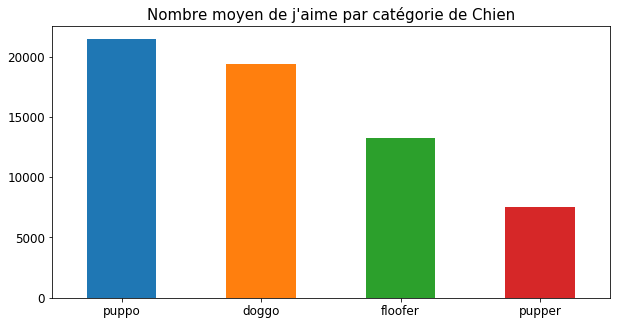

In [131]:
import matplotlib.pyplot as plt

plt.plot()
df.query('stade !="None"').groupby(['stade']).mean()['favorite_count'].sort_values(
                                    ascending = False).plot(kind='bar' , figsize=(10,5))


plt.xticks(rotation=0 , size=12)
plt.xlabel('')
plt.yticks(size=12)
plt.title("Nombre moyen de j'aime par catégorie de Chien",size=15)
plt.plot()

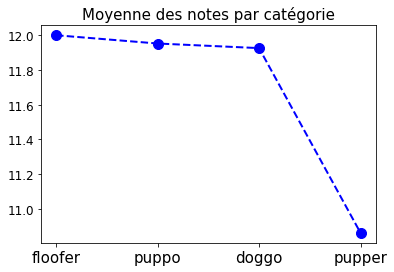

In [132]:
x = df.query('stade !="None"').groupby(['stade']).mean()['rating_numerator'].sort_values(ascending = False)

plt.plot(x, 'go--', linewidth=2, markersize=10 ,color='b')
plt.xticks(size=15)
plt.yticks(size=12)
plt.rcParams['figure.figsize'] = [5, 5]
plt.title("Moyenne des notes par catégorie",size=15)
plt.show()

<a id='conclusion'></a>
## Conclusion :

Notre analyse donc s'est basée sur la préférence des internautes par rapport aux différentes catégories de chien : **puppo, floofer, doggo et pupper**. Pour cela, nous avons considéré 3 variables principales : **le nombre moyen de retweet, le nombre de moyen j'aime et la moyenne des notes obtenues** pour chaque catégorie de chien.


A partir de cela nous avions donc pu constater :

* Nous pouvons maintenant constater que la catégorie de chien **pupper** est la moins appréciée

* Il y a une litige entre les 3 autres catégorie mais il semble a priori que c'est la catégorie **puppo** qui est le mieux appréciée dans l'ensemble **(moyenne de note et j'aime obtenue)**.